# Explain Fourier transform

- We visualize the portion of Fourier transform - as Discrete Cosine Transform (DCT) - of a 1D signal.
- We visualize the inner product of the signal with the DCT basis functions.

In [1]:
from typing import Callable

import numpy as np
from scipy.integrate import quad


def fourier_transform(
    func: Callable[[float], float], t_min: float, t_max: float, normalize: bool = False
) -> Callable[[float], float]:
    def func_with_hat(f: float) -> float:
        integrand = lambda t: func(t) * np.exp(-2j * np.pi * f * t)
        integral: complex = quad(integrand, t_min, t_max, complex_func=True)[0]
        if normalize:
            integral /= t_max - t_min
        return integral.real

    return func_with_hat

Manim Community v0.18.1

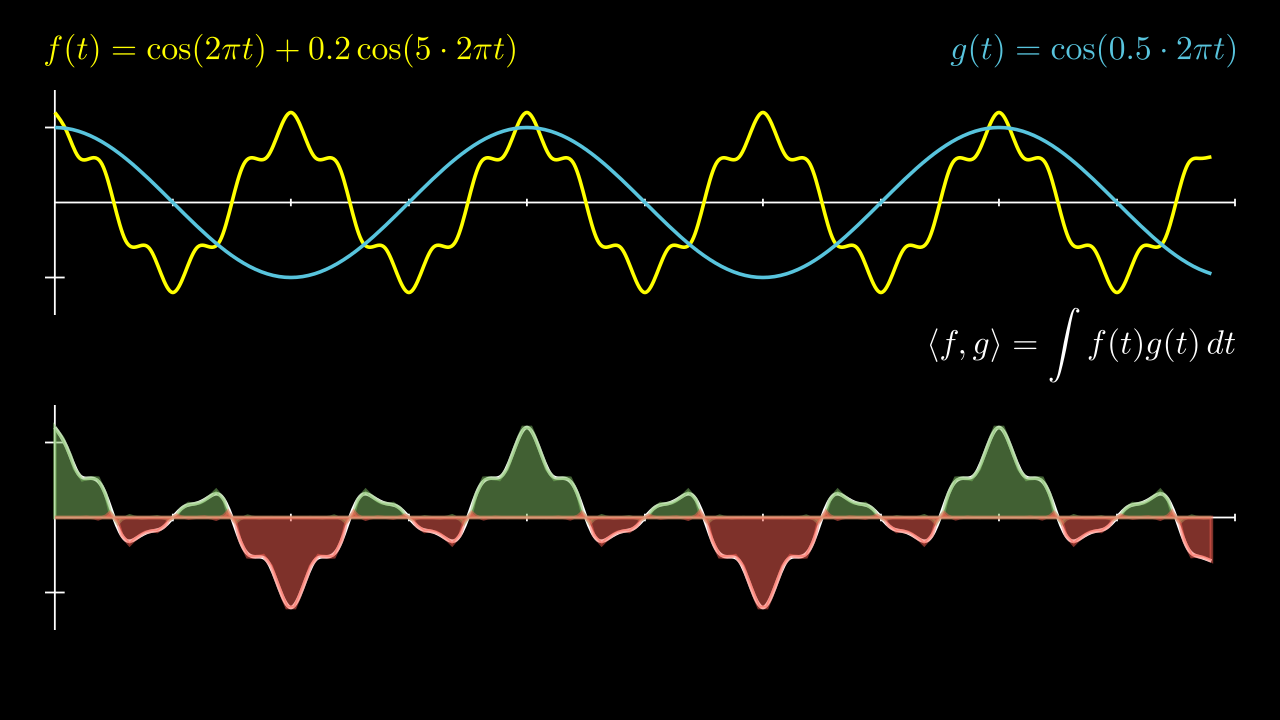

In [2]:
from manim import *

class CosineTransformAsInnerProduct(Scene):
    def construct(self):
        t_min, t_max = 0, 5

        comp1 = lambda t: np.cos(TAU * t)
        comp2 = lambda t: np.cos(5 * TAU * t) * 0.2
        signal = lambda t: comp1(t) + comp2(t)
        basis_factory = lambda n: lambda t: np.cos(n * TAU * t)

        # Axes
        signal_axes = Axes(
            x_range=[t_min, t_max, 0.5],
            y_range=[-1.5, 1.5],
            tips=False,
        )
        signal_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        signal_axes.stretch_to_fit_height(2.5)
        signal_axes.to_edge(LEFT).to_edge(UP, LARGE_BUFF)

        # Signal
        signal_graph = signal_axes.plot(signal, [t_min, t_max - SMALL_BUFF], color=YELLOW)
        signal_text = MathTex(r"f(t) = \cos(2\pi t) + 0.2\cos(5\cdot 2\pi t)", font_size=36, color=YELLOW)
        signal_text.next_to(signal_axes, UP).to_edge(LEFT)

        # basis
        initial_basis_freq = 0.5
        initial_basis = basis_factory(initial_basis_freq)

        initial_basis_graph = signal_axes.plot(initial_basis, [t_min, t_max - SMALL_BUFF], color=BLUE)
        initial_basis_text = MathTex(fr"g(t) = \cos({initial_basis_freq}\cdot 2\pi t)", font_size=36, color=BLUE)
        initial_basis_text.next_to(signal_axes, UP).to_edge(RIGHT)

        # product axes
        product_axes = Axes(
            x_range=[t_min, t_max, 0.5],
            y_range=[-1.5, 1.5],
            tips=False,
            axis_config={"color": WHITE},
        )
        product_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        product_axes.stretch_to_fit_height(2.5)
        product_axes.next_to(signal_axes, DOWN, LARGE_BUFF)
        

        # inner product
        inner_product = lambda t: signal(t) * initial_basis(t)
        inner_product_graph = product_axes.plot(inner_product, [t_min, t_max - SMALL_BUFF], color=WHITE)
        inner_product_text = MathTex(r"\langle f, g \rangle = \int f(t)g(t) \, dt", font_size=36, color=WHITE)
        inner_product_text.next_to(product_axes, UP).to_edge(RIGHT)

        # area under the curve
        positive_area, negative_area = self.area_under_curve(product_axes, inner_product, (t_min, t_max - SMALL_BUFF))

        self.add(signal_axes, product_axes)
        self.play(Create(signal_graph), Write(signal_text))
        self.play(Create(initial_basis_graph), Write(initial_basis_text))
        self.play(ReplacementTransform(signal_graph.copy(), inner_product_graph),
                  ReplacementTransform(initial_basis_graph.copy(), inner_product_graph),
                   Write(inner_product_text))
        self.play(FadeIn(positive_area), FadeIn(negative_area))
        self.wait(2)

    def area_under_curve(self, axes: Axes, function: Callable[[float], float], x_range: tuple[float, float], opacity: float = 0.5) -> tuple[Polygon, Polygon]:
        positive_function = lambda t: max(function(t), 0)
        positive_function_graph = axes.plot(positive_function, x_range, color=WHITE)
        positive_area = axes.get_area(positive_function_graph, x_range, color=GREEN, opacity=opacity)
        negative_function = lambda t: min(function(t), 0)
        negative_function_graph = axes.plot(negative_function, x_range, color=WHITE)
        negative_area = axes.get_area(negative_function_graph, x_range, color=RED, opacity=opacity)
        return positive_area, negative_area

%manim -v WARNING -qm -s CosineTransformAsInnerProduct

Manim Community v0.18.1

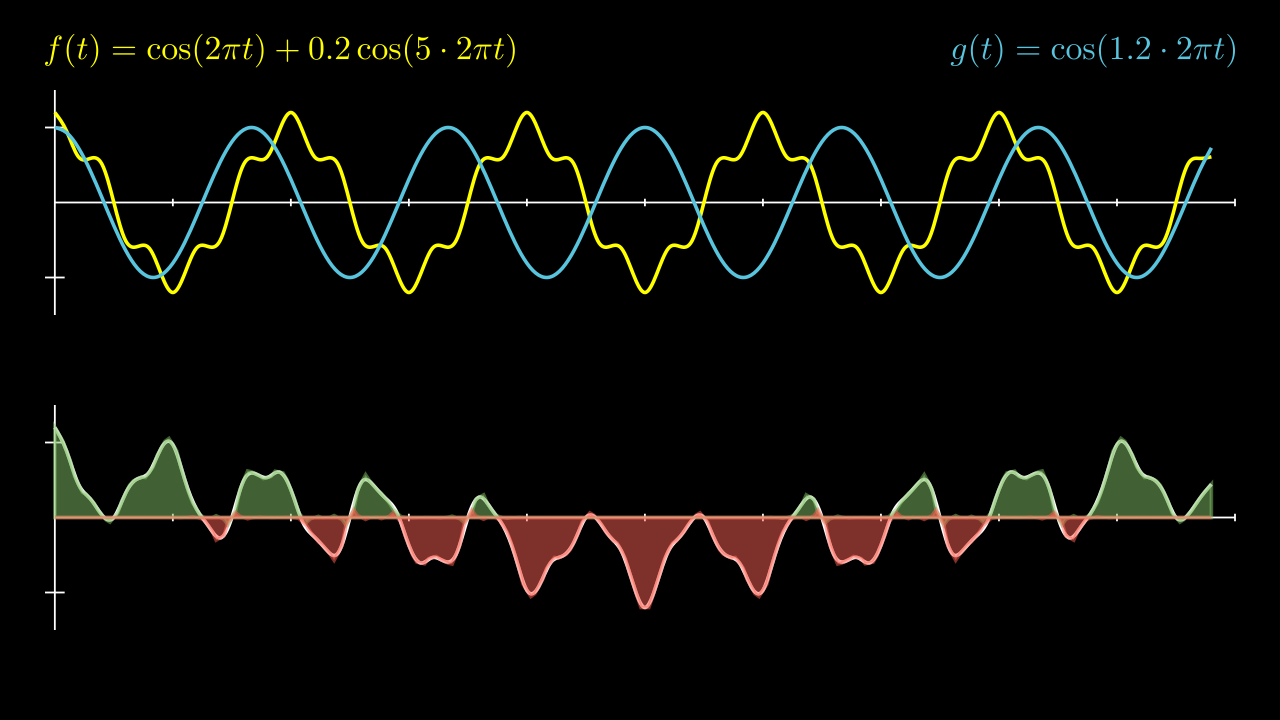

In [4]:
from manim import *

class CosineTransformChangeFreq(Scene):
    def construct(self):
        t_min, t_max = 0, 5

        comp1 = lambda t: np.cos(TAU * t)
        comp2 = lambda t: np.cos(5 * TAU * t) * 0.2
        signal = lambda t: comp1(t) + comp2(t)
        basis_factory = lambda n: lambda t: np.cos(n * TAU * t)

        # Axes
        signal_axes = Axes(
            x_range=[t_min, t_max, 0.5],
            y_range=[-1.5, 1.5],
            tips=False,
        )
        signal_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        signal_axes.stretch_to_fit_height(2.5)
        signal_axes.to_edge(LEFT).to_edge(UP, LARGE_BUFF)

        # Signal
        signal_graph = signal_axes.plot(signal, [t_min, t_max - SMALL_BUFF], color=YELLOW)
        signal_text = MathTex(r"f(t) = \cos(2\pi t) + 0.2\cos(5\cdot 2\pi t)", font_size=36, color=YELLOW)
        signal_text.next_to(signal_axes, UP).to_edge(LEFT)

        # product axes
        product_axes = Axes(
            x_range=[t_min, t_max, 0.5],
            y_range=[-1.5, 1.5],
            tips=False,
            axis_config={"color": WHITE},
        )
        product_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        product_axes.stretch_to_fit_height(2.5)
        product_axes.next_to(signal_axes, DOWN, LARGE_BUFF)
        
        frequencies = np.linspace(0.8, 1.2, 41).round(2)


        # first basis
        basis_freq = frequencies[0]
        basis = basis_factory(basis_freq)
        basis_graph = signal_axes.plot(basis, [t_min, t_max - SMALL_BUFF], color=BLUE)
        basis_text = MathTex(fr"g(t) = \cos({basis_freq}\cdot 2\pi t)", font_size=36, color=BLUE)
        basis_text.next_to(signal_axes, UP).to_edge(RIGHT)
        inner_product = lambda t: signal(t) * basis(t)
        inner_product_graph = product_axes.plot(inner_product, [t_min, t_max - SMALL_BUFF], color=WHITE)
        positive_area, negative_area = self.area_under_curve(product_axes, inner_product, (t_min, t_max - SMALL_BUFF))
        self.add(signal_axes, product_axes, signal_graph, signal_text, basis_graph, basis_text)
        self.add(inner_product_graph, positive_area, negative_area)
        basis_graphs, basis_texts, inner_product_graphs, pos_areas, neg_areas = [basis_graph], [basis_text], [inner_product_graph], [positive_area], [negative_area]

        # change basis
        for freq in frequencies[1:]:
            basis = basis_factory(freq)
            basis_graph = signal_axes.plot(basis, [t_min, t_max - SMALL_BUFF], color=BLUE)
            basis_text = MathTex(fr"g(t) = \cos({freq}\cdot 2\pi t)", font_size=36, color=BLUE)
            basis_text.next_to(signal_axes, UP).to_edge(RIGHT)
            inner_product = lambda t: signal(t) * basis(t)
            inner_product_graph = product_axes.plot(inner_product, [t_min, t_max - SMALL_BUFF], color=WHITE)
            positive_area, negative_area = self.area_under_curve(product_axes, inner_product, (t_min, t_max - SMALL_BUFF))

            self.remove(basis_texts[-1])
            self.add(basis_text)
            self.play(
                ReplacementTransform(basis_graphs[-1], basis_graph, rate_func = linear, run_time = 0.4),
                ReplacementTransform(inner_product_graphs[-1], inner_product_graph, rate_func = linear, run_time = 0.4),
                ReplacementTransform(pos_areas[-1], positive_area, rate_func = linear, run_time = 0.4),
                ReplacementTransform(neg_areas[-1], negative_area, rate_func = linear, run_time = 0.4),
            )
            basis_graphs.append(basis_graph)
            inner_product_graphs.append(inner_product_graph)
            basis_texts.append(basis_text)
            pos_areas.append(positive_area)
            neg_areas.append(negative_area)
                      
        self.wait(2)

    def area_under_curve(self, axes: Axes, function: Callable[[float], float], x_range: tuple[float, float], opacity: float = 0.5) -> tuple[Polygon, Polygon]:
        positive_function = lambda t: max(function(t), 0)
        positive_function_graph = axes.plot(positive_function, x_range, color=WHITE)
        positive_area = axes.get_area(positive_function_graph, x_range, color=GREEN, opacity=opacity)
        negative_function = lambda t: min(function(t), 0)
        negative_function_graph = axes.plot(negative_function, x_range, color=WHITE)
        negative_area = axes.get_area(negative_function_graph, x_range, color=RED, opacity=opacity)
        return positive_area, negative_area

%manim -v WARNING -qm -s CosineTransformChangeFreq